In [1]:
# Import important libraries
import numpy as np
import pandas as pd

# Import important libraries visulization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Library to ignore warnings
import warnings
warnings.filterwarnings

pd.set_option('display.max_columns',None)

# Import libraries for handling categorical data
from sklearn.preprocessing import LabelEncoder

from scipy import stats
from scipy.stats import uniform

# Import libraries to handle scaling
from sklearn.preprocessing import MinMaxScaler

# Libraries to split data into Train and Test Data
from sklearn.model_selection import train_test_split

# Libraries to evaluate model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Import models algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import RandomizedSearchCV


C:\Users\PRATIK KALE\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import mysql.connector
import pandas as pd

In [3]:
connection = mysql.connector.connect(host='18.136.157.135',
                                    user='dm_team3',
                                    password='DM!$!Team!27@9!20&',
                                    database='project_telecom',
                                    auth_plugin='mysql_native_password')

In [4]:
database = "select * from  telecom_churn_data"
data = pd.read_sql(database,connection)
data

C:\Users\PRATIK KALE\AppData\Local\Temp\ipykernel_29536\1310219391.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(database,connection)


,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,columns11,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,no,yes,25,144,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,6,2.3,3,False.
4613,NM,177,408,343-6820,no,yes,29,189,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,296.1,129,25.17,200.9,91,9.04,13,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,226.3,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


In [5]:
data.shape

(4617, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   columns1   4617 non-null   object
 1   columns2   4617 non-null   object
 2   columns3   4617 non-null   object
 3   columns4   4617 non-null   object
 4   columns5   4617 non-null   object
 5   columns6   4617 non-null   object
 6   columns7   4617 non-null   object
 7   columns8   4617 non-null   object
 8   columns9   4617 non-null   object
 9   columns10  4617 non-null   object
 10  columns11  4617 non-null   object
 11  columns12  4617 non-null   object
 12  columns13  4617 non-null   object
 13  columns14  4617 non-null   object
 14  columns15  4617 non-null   object
 15  columns16  4617 non-null   object
 16  columns17  4617 non-null   object
 17  columns18  4617 non-null   object
 18  columns19  4617 non-null   object
 19  columns20  4617 non-null   object
 20  columns21  4617 non-null   obj

In [7]:
data = data.rename(columns={'columns1': 'State','columns2': 'Account_Length','columns3':'Area_Code','columns4':'Phone','columns5':'International_Plan','columns6':'VMail_Plan','columns7':'VMail_Message','columns8':'Day_Mins','columns9':'Day_Calls','columns10':'Day_Charge','columns11':'Eve_Mins','columns12':'Eve_Calls','columns13':'Eve_Charge','columns14':'Night_Mins','columns15':'Night_Calls','columns16':'Night_Charge','columns17':'International_Mins','columns18':'International_calls','columns19':'International_Charge','columns20':'CustServ_Calls','columns21':'Churn'})

In [8]:
data.columns

Index(['State', 'Account_Length', 'Area_Code', 'Phone', 'International_Plan',
       'VMail_Plan', 'VMail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge',
       'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls',
       'Night_Charge', 'International_Mins', 'International_calls',
       'International_Charge', 'CustServ_Calls', 'Churn'],
      dtype='object')

In [9]:
#creating a list except the elements which are catergorical[state,Int_plan,Phone,Vmail_plan,Churn]
list = ['Account_Length', 'Area_Code', 'VMail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge',
       'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls',
       'Night_Charge', 'International_Mins', 'International_calls',
       'International_Charge', 'CustServ_Calls']

#ff['Acc_len']= pd.to_numeric(ff.Acc_len,errors='coerce')

data[list]= data[list].apply(pd.to_numeric,errors='coerce')

In [10]:
data

,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,no,yes,25,144.0,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,6,2.30,3,False.
4613,NM,177,408,343-6820,no,yes,29,189.0,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,296.1,129,25.17,200.9,91,9.04,13.0,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,226.3,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


In [11]:
data.head()

,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [12]:
data.drop('Phone',axis=1,inplace=True)

In [13]:
data.dtypes

State                    object
Account_Length            int64
Area_Code                 int64
International_Plan       object
VMail_Plan               object
VMail_Message             int64
Day_Mins                float64
Day_Calls                 int64
Day_Charge              float64
Eve_Mins                float64
Eve_Calls                 int64
Eve_Charge              float64
Night_Mins              float64
Night_Calls               int64
Night_Charge            float64
International_Mins      float64
International_calls       int64
International_Charge    float64
CustServ_Calls            int64
Churn                    object
dtype: object

In [14]:
data.tail()

,State,Account_Length,Area_Code,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn
4612,NY,57,510,no,yes,25,144.0,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,6,2.30,3,False.
4613,NM,177,408,no,yes,29,189.0,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,no,yes,33,127.5,126,21.68,296.1,129,25.17,200.9,91,9.04,13.0,3,3.51,1,False.
4615,MI,98,415,no,yes,23,168.9,98,28.71,226.3,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.
4616,IN,140,415,no,no,0,204.7,100,34.80,126.8,107,10.78,202.8,115,9.13,12.1,4,3.27,2,False.


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4617 non-null   object 
 1   Account_Length        4617 non-null   int64  
 2   Area_Code             4617 non-null   int64  
 3   International_Plan    4617 non-null   object 
 4   VMail_Plan            4617 non-null   object 
 5   VMail_Message         4617 non-null   int64  
 6   Day_Mins              4617 non-null   float64
 7   Day_Calls             4617 non-null   int64  
 8   Day_Charge            4617 non-null   float64
 9   Eve_Mins              4617 non-null   float64
 10  Eve_Calls             4617 non-null   int64  
 11  Eve_Charge            4617 non-null   float64
 12  Night_Mins            4617 non-null   float64
 13  Night_Calls           4617 non-null   int64  
 14  Night_Charge          4617 non-null   float64
 15  International_Mins   

In [16]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
State,4617,51,WV,149,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Account_Length,4617.0,NaN,NaN,NaN,100.645224,39.597194,1.0,74.0,100.0,127.0,243.0
Area_Code,4617.0,NaN,NaN,NaN,437.04635,42.288212,408.0,408.0,415.0,510.0,510.0
International_Plan,4617,2,no,4171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VMail_Plan,4617,2,no,3381,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VMail_Message,4617.0,NaN,NaN,NaN,7.849903,13.592333,0.0,0.0,0.0,17.0,51.0
Day_Mins,4617.0,NaN,NaN,NaN,180.447152,53.98354,0.0,143.7,180.0,216.8,351.5
Day_Calls,4617.0,NaN,NaN,NaN,100.054364,19.883027,0.0,87.0,100.0,113.0,165.0
Day_Charge,4617.0,NaN,NaN,NaN,30.676576,9.177145,0.0,24.43,30.6,36.86,59.76
Eve_Mins,4617.0,NaN,NaN,NaN,200.429088,50.557001,0.0,165.9,200.8,234.0,363.7


In [17]:
data.nunique()

State                     51
Account_Length           218
Area_Code                  3
International_Plan         2
VMail_Plan                 2
VMail_Message             47
Day_Mins                1901
Day_Calls                123
Day_Charge              1901
Eve_Mins                1833
Eve_Calls                125
Eve_Charge              1621
Night_Mins              1813
Night_Calls              130
Night_Charge            1012
International_Mins       168
International_calls       21
International_Charge     168
CustServ_Calls            10
Churn                      2
dtype: int64

In [18]:
print(data.Churn.value_counts())

Churn
False.    3961
True.      656
Name: count, dtype: int64


In [19]:
data.isnull().sum()

State                   0
Account_Length          0
Area_Code               0
International_Plan      0
VMail_Plan              0
VMail_Message           0
Day_Mins                0
Day_Calls               0
Day_Charge              0
Eve_Mins                0
Eve_Calls               0
Eve_Charge              0
Night_Mins              0
Night_Calls             0
Night_Charge            0
International_Mins      0
International_calls     0
International_Charge    0
CustServ_Calls          0
Churn                   0
dtype: int64

In [20]:
data.duplicated().sum()

0

In [21]:
df_num =data.select_dtypes(include=['float64','int64'])
df_num

,Account_Length,Area_Code,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,57,510,25,144.0,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,6,2.30,3
4613,177,408,29,189.0,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3
4614,67,408,33,127.5,126,21.68,296.1,129,25.17,200.9,91,9.04,13.0,3,3.51,1
4615,98,415,23,168.9,98,28.71,226.3,117,19.24,165.5,96,7.45,14.3,3,3.86,0


In [22]:
data.CustServ_Calls.value_counts()

CustServ_Calls
1    1651
2    1031
0     951
3     616
4     234
5      89
6      28
7      13
9       2
8       2
Name: count, dtype: int64

In [23]:
df_cat =data.select_dtypes(include='object')
df_cat

,State,International_Plan,VMail_Plan,Churn
0,KS,no,yes,False.
1,OH,no,yes,False.
2,NJ,no,no,False.
3,OH,yes,no,False.
4,OK,yes,no,False.
...,...,...,...,...
4612,NY,no,yes,False.
4613,NM,no,yes,False.
4614,VT,no,yes,False.
4615,MI,no,yes,False.


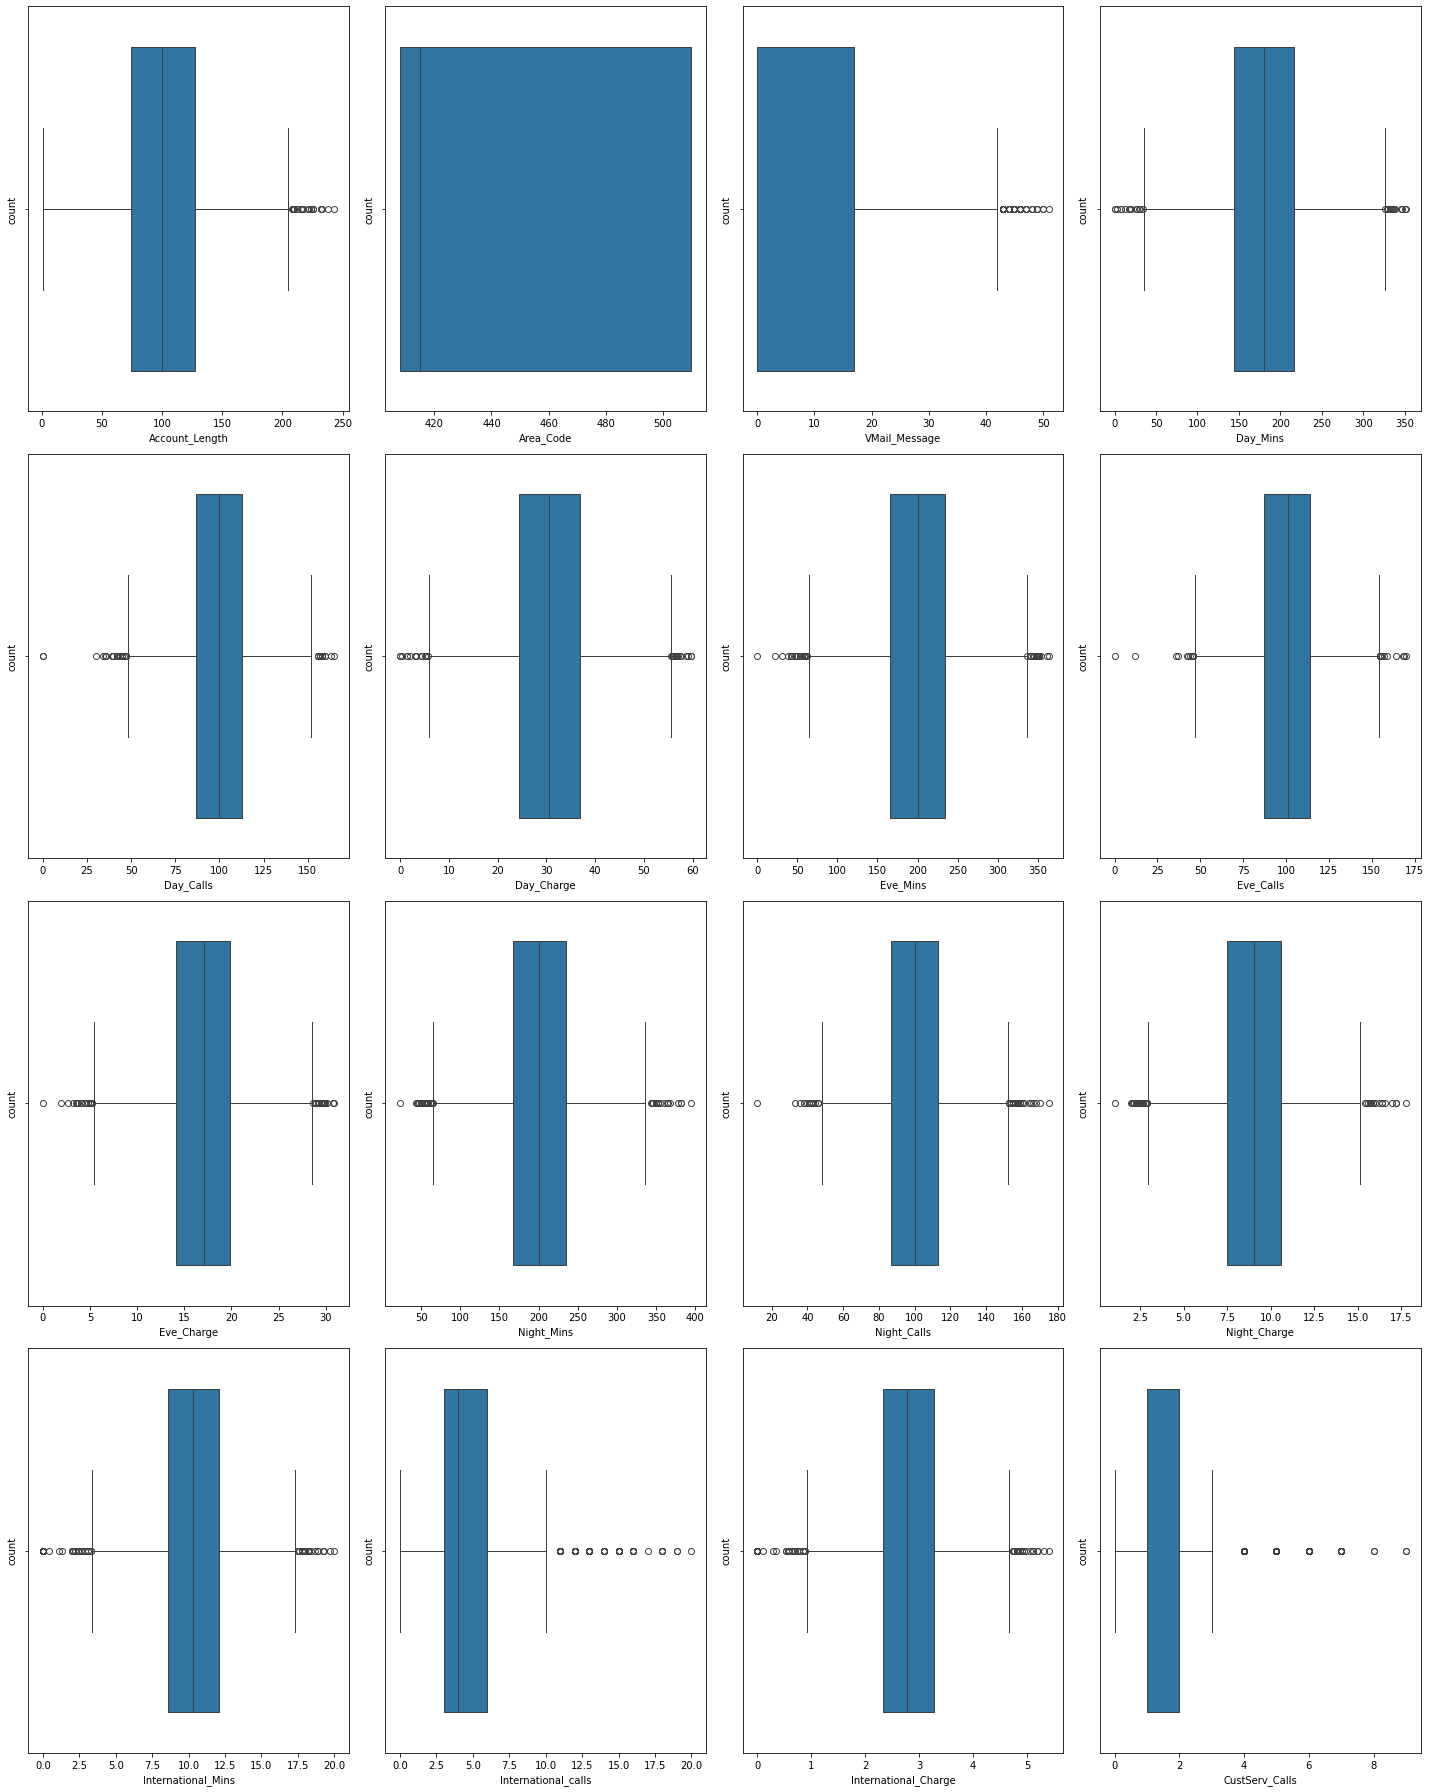

In [24]:
plt.figure(figsize=(20, 25))
plotnumber = 1

for column in df_num.columns:  # Use data.columns to iterate over column names
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.boxplot(x=df_num[column])  # Use x=data[column] to specify the column for boxplot
        plt.xlabel(column)
        plt.ylabel('count')
    plotnumber += 1

plt.tight_layout()
plt.show()

In [25]:
from scipy import stats  # Make sure to import the necessary libraries

col = 1
for c in df_num:  # Assuming df1 is your DataFrame
    if col <=14:
        IQR = stats.iqr(df_num[c], interpolation='midpoint')
        print(c, 'IQR:', IQR)
        Q1 = df_num[c].quantile(0.25)
        Q3 = df_num[c].quantile(0.75)
        min_limit = Q1 - 1.5 * IQR
        print(c, 'min_limit:', min_limit)
        max_limit = Q3 + 1.5 * IQR
        print(c, 'max_limit:', max_limit, '\n')

        # Replace outliers with the median
        df_num.loc[(df_num[c] < min_limit) | (df_num[c] > max_limit), c] = np.median(df_num[c])

        # Double-check if outliers are replaced
        replaced_outliers = df_num.loc[(df_num[c] < min_limit) | (df_num[c] > max_limit), c]
        print(f"Replaced outliers in {c}:", replaced_outliers, '\n')
    
    col += 1

Account_Length IQR: 53.0
Account_Length min_limit: -5.5
Account_Length max_limit: 206.5 

Replaced outliers in Account_Length: Series([], Name: Account_Length, dtype: int64) 

Area_Code IQR: 102.0
Area_Code min_limit: 255.0
Area_Code max_limit: 663.0 

Replaced outliers in Area_Code: Series([], Name: Area_Code, dtype: int64) 

VMail_Message IQR: 17.0
VMail_Message min_limit: -25.5
VMail_Message max_limit: 42.5 

Replaced outliers in VMail_Message: Series([], Name: VMail_Message, dtype: int64) 

Day_Mins IQR: 73.10000000000002
Day_Mins min_limit: 34.049999999999955
Day_Mins max_limit: 326.45000000000005 

Replaced outliers in Day_Mins: Series([], Name: Day_Mins, dtype: float64) 

Day_Calls IQR: 26.0
Day_Calls min_limit: 48.0
Day_Calls max_limit: 152.0 

Replaced outliers in Day_Calls: Series([], Name: Day_Calls, dtype: int64) 

Day_Charge IQR: 12.43
Day_Charge min_limit: 5.785
Day_Charge max_limit: 55.504999999999995 

Replaced outliers in Day_Charge: Series([], Name: Day_Charge, dtype:

C:\Users\PRATIK KALE\AppData\Local\Temp\ipykernel_29536\1155145137.py:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  IQR = stats.iqr(df_num[c], interpolation='midpoint')
C:\Users\PRATIK KALE\AppData\Local\Temp\ipykernel_29536\1155145137.py:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  IQR = stats.iqr(df_num[c], interpolation='midpoint')
C:\Users\PRATIK KALE\AppData\Local\Temp\ipykernel_29536\1155145137.py:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'hig

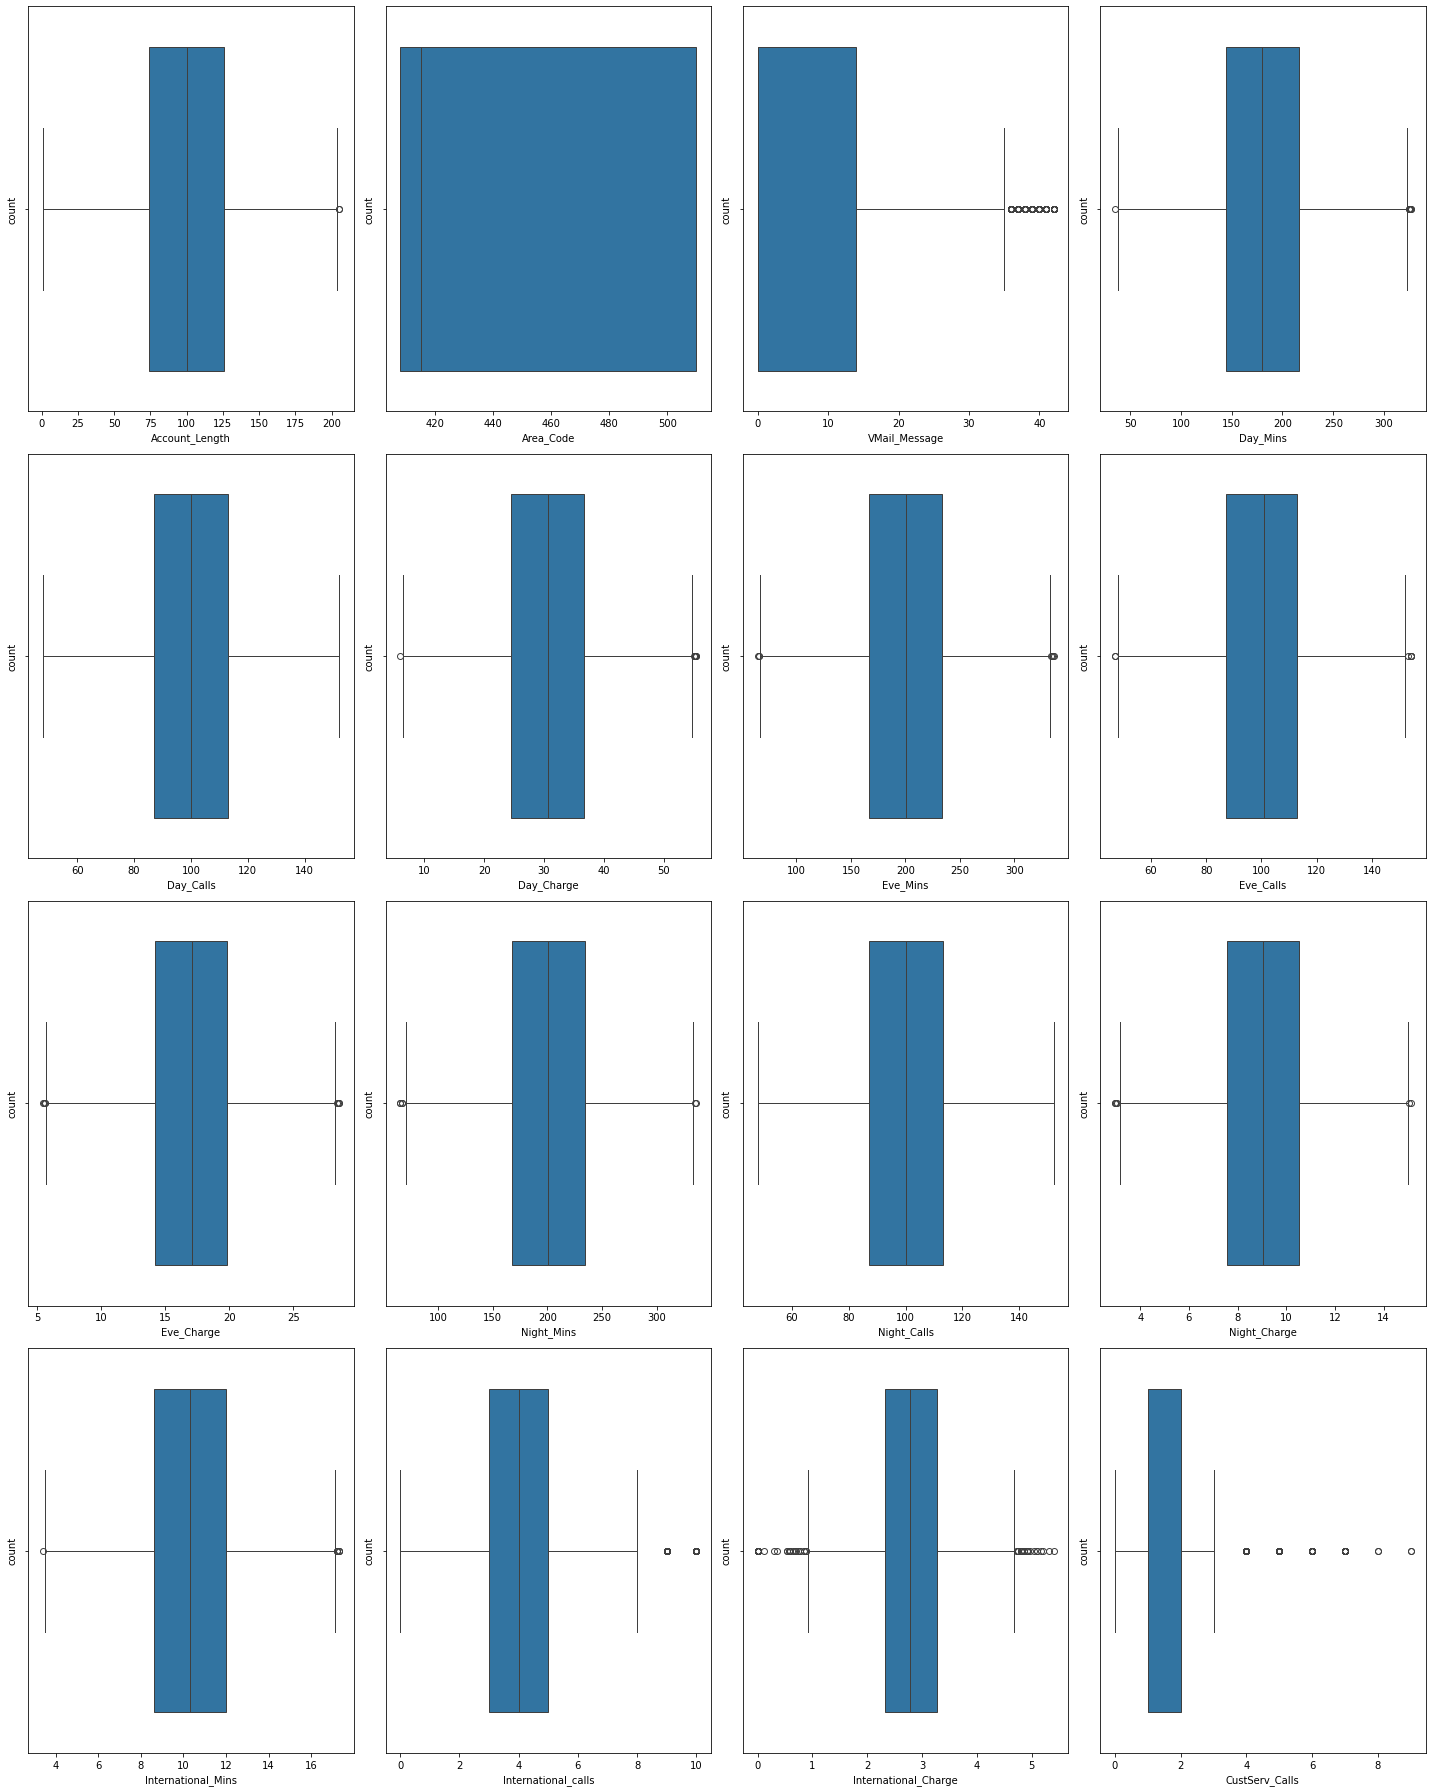

In [26]:
plt.figure(figsize=(20, 25))
plotnumber = 1

for column in df_num.columns:  # Use data.columns to iterate over column names
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.boxplot(x=df_num[column])  # Use x=data[column] to specify the column for boxplot
        plt.xlabel(column)
        plt.ylabel('count')
    plotnumber += 1

plt.tight_layout()
plt.show()

In [27]:
df_cat.columns

Index(['State', 'International_Plan', 'VMail_Plan', 'Churn'], dtype='object')

In [28]:
df_cat.International_Plan.unique()

array([' no', ' yes'], dtype=object)

In [29]:
df_cat.International_Plan =df_cat.International_Plan.map({' no':0,' yes':1})

In [30]:
df_cat.VMail_Plan.unique()

array([' yes', ' no'], dtype=object)

In [31]:
df_cat.VMail_Plan =df_cat.VMail_Plan.map({' yes':0,' no':1})

In [32]:
df_cat.Churn.unique()

array([' False.', ' True.'], dtype=object)

In [33]:
df_cat.Churn =df_cat.Churn.map({' False.':0,' True.':1})

In [34]:
df_cat.State.unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [35]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

In [36]:
df_cat.State =lc.fit_transform(df_cat.State)

In [37]:
df_cat.head(20)

,State,International_Plan,VMail_Plan,Churn
0,16,0,0,0
1,35,0,0,0
2,31,0,1,0
3,35,1,1,0
4,36,1,1,0
5,1,1,1,0
6,19,0,0,0
7,24,1,1,0
8,18,0,1,0
9,49,1,0,0


In [38]:
data

,State,Account_Length,Area_Code,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,no,yes,25,144.0,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,6,2.30,3,False.
4613,NM,177,408,no,yes,29,189.0,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,no,yes,33,127.5,126,21.68,296.1,129,25.17,200.9,91,9.04,13.0,3,3.51,1,False.
4615,MI,98,415,no,yes,23,168.9,98,28.71,226.3,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


In [39]:
df_num

,Account_Length,Area_Code,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,200.8,88,17.07,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,57,510,25,144.0,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,6,2.30,3
4613,177,408,29,189.0,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3
4614,67,408,33,127.5,126,21.68,296.1,129,25.17,200.9,91,9.04,13.0,3,3.51,1
4615,98,415,23,168.9,98,28.71,226.3,117,19.24,165.5,96,7.45,14.3,3,3.86,0


In [40]:
df_num.columns

Index(['Account_Length', 'Area_Code', 'VMail_Message', 'Day_Mins', 'Day_Calls',
       'Day_Charge', 'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins',
       'Night_Calls', 'Night_Charge', 'International_Mins',
       'International_calls', 'International_Charge', 'CustServ_Calls'],
      dtype='object')

In [41]:
## Apply scaling to all columns
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
df_num =sc.fit_transform(df_num)

In [42]:
df_num =pd.DataFrame(df_num,columns=['Account_Length', 'Area_Code', 'VMail_Message', 'Day_Mins', 'Day_Calls',
       'Day_Charge', 'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins',
       'Night_Calls', 'Night_Charge', 'International_Mins',
       'International_calls', 'International_Charge', 'CustServ_Calls'])

In [43]:
data

,State,Account_Length,Area_Code,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,no,yes,25,144.0,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,6,2.30,3,False.
4613,NM,177,408,no,yes,29,189.0,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,no,yes,33,127.5,126,21.68,296.1,129,25.17,200.9,91,9.04,13.0,3,3.51,1,False.
4615,MI,98,415,no,yes,23,168.9,98,28.71,226.3,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


In [44]:
df_num

,Account_Length,Area_Code,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls
0,0.722804,-0.521392,1.355720,1.609731,0.511593,1.610020,-0.065339,-0.062503,-0.065158,0.905211,-0.461999,0.904454,-0.12704,-0.596661,-0.102005,-0.433885
1,0.179794,-0.521392,1.432525,-0.359581,1.190052,-0.359870,-0.104328,0.144919,-0.103784,1.104506,0.166385,1.105346,1.32558,-0.596661,1.241481,-0.433885
2,0.955522,-0.521392,-0.564400,1.196841,0.720350,1.197014,-1.628983,0.507908,-1.629530,-0.781613,0.218750,-0.780301,0.73668,0.375215,0.690651,-1.199068
3,-0.414932,-0.686941,-0.564400,2.262363,-1.523782,2.262546,0.004429,-0.632913,0.004853,-0.076886,-0.566730,-0.077178,-1.46188,1.347092,-1.338013,0.331298
4,-0.647650,-0.521392,-0.564400,-0.262542,0.668161,-0.262495,-1.072884,1.130174,-1.071860,-0.282346,1.108961,-0.282636,-0.08778,-0.596661,-0.061701,1.096480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,-1.113088,1.725340,1.355720,-0.694459,-1.001891,-0.694527,-0.274646,0.611619,-0.275189,-0.863797,1.161327,-0.862484,-0.71594,0.861154,-0.639400,1.096480
4613,1.989827,-0.686941,1.662939,0.161763,-0.480000,0.161703,2.103651,-0.218069,2.102754,-0.761067,0.847135,-0.762038,2.11078,-1.568537,1.966963,1.096480
4614,-0.854511,-0.686941,1.970158,-1.008407,1.346619,-1.007919,1.960009,1.493162,1.960319,0.005297,-0.461999,0.005005,1.05076,-0.596661,0.986218,-0.433885
4615,-0.052925,-0.521392,1.202111,-0.220683,-0.114676,-0.221082,0.527696,0.870896,0.528725,-0.722030,-0.200172,-0.720946,1.56114,-0.596661,1.456438,-1.199068


In [45]:
df_cat

,State,International_Plan,VMail_Plan,Churn
0,16,0,0,0
1,35,0,0,0
2,31,0,1,0
3,35,1,1,0
4,36,1,1,0
...,...,...,...,...
4612,34,0,0,0
4613,32,0,0,0
4614,46,0,0,0
4615,22,0,0,0


In [46]:
df =pd.concat([df_num,df_cat],axis=1)

In [47]:
df

,Account_Length,Area_Code,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,State,International_Plan,VMail_Plan,Churn
0,0.722804,-0.521392,1.355720,1.609731,0.511593,1.610020,-0.065339,-0.062503,-0.065158,0.905211,-0.461999,0.904454,-0.12704,-0.596661,-0.102005,-0.433885,16,0,0,0
1,0.179794,-0.521392,1.432525,-0.359581,1.190052,-0.359870,-0.104328,0.144919,-0.103784,1.104506,0.166385,1.105346,1.32558,-0.596661,1.241481,-0.433885,35,0,0,0
2,0.955522,-0.521392,-0.564400,1.196841,0.720350,1.197014,-1.628983,0.507908,-1.629530,-0.781613,0.218750,-0.780301,0.73668,0.375215,0.690651,-1.199068,31,0,1,0
3,-0.414932,-0.686941,-0.564400,2.262363,-1.523782,2.262546,0.004429,-0.632913,0.004853,-0.076886,-0.566730,-0.077178,-1.46188,1.347092,-1.338013,0.331298,35,1,1,0
4,-0.647650,-0.521392,-0.564400,-0.262542,0.668161,-0.262495,-1.072884,1.130174,-1.071860,-0.282346,1.108961,-0.282636,-0.08778,-0.596661,-0.061701,1.096480,36,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,-1.113088,1.725340,1.355720,-0.694459,-1.001891,-0.694527,-0.274646,0.611619,-0.275189,-0.863797,1.161327,-0.862484,-0.71594,0.861154,-0.639400,1.096480,34,0,0,0
4613,1.989827,-0.686941,1.662939,0.161763,-0.480000,0.161703,2.103651,-0.218069,2.102754,-0.761067,0.847135,-0.762038,2.11078,-1.568537,1.966963,1.096480,32,0,0,0
4614,-0.854511,-0.686941,1.970158,-1.008407,1.346619,-1.007919,1.960009,1.493162,1.960319,0.005297,-0.461999,0.005005,1.05076,-0.596661,0.986218,-0.433885,46,0,0,0
4615,-0.052925,-0.521392,1.202111,-0.220683,-0.114676,-0.221082,0.527696,0.870896,0.528725,-0.722030,-0.200172,-0.720946,1.56114,-0.596661,1.456438,-1.199068,22,0,0,0


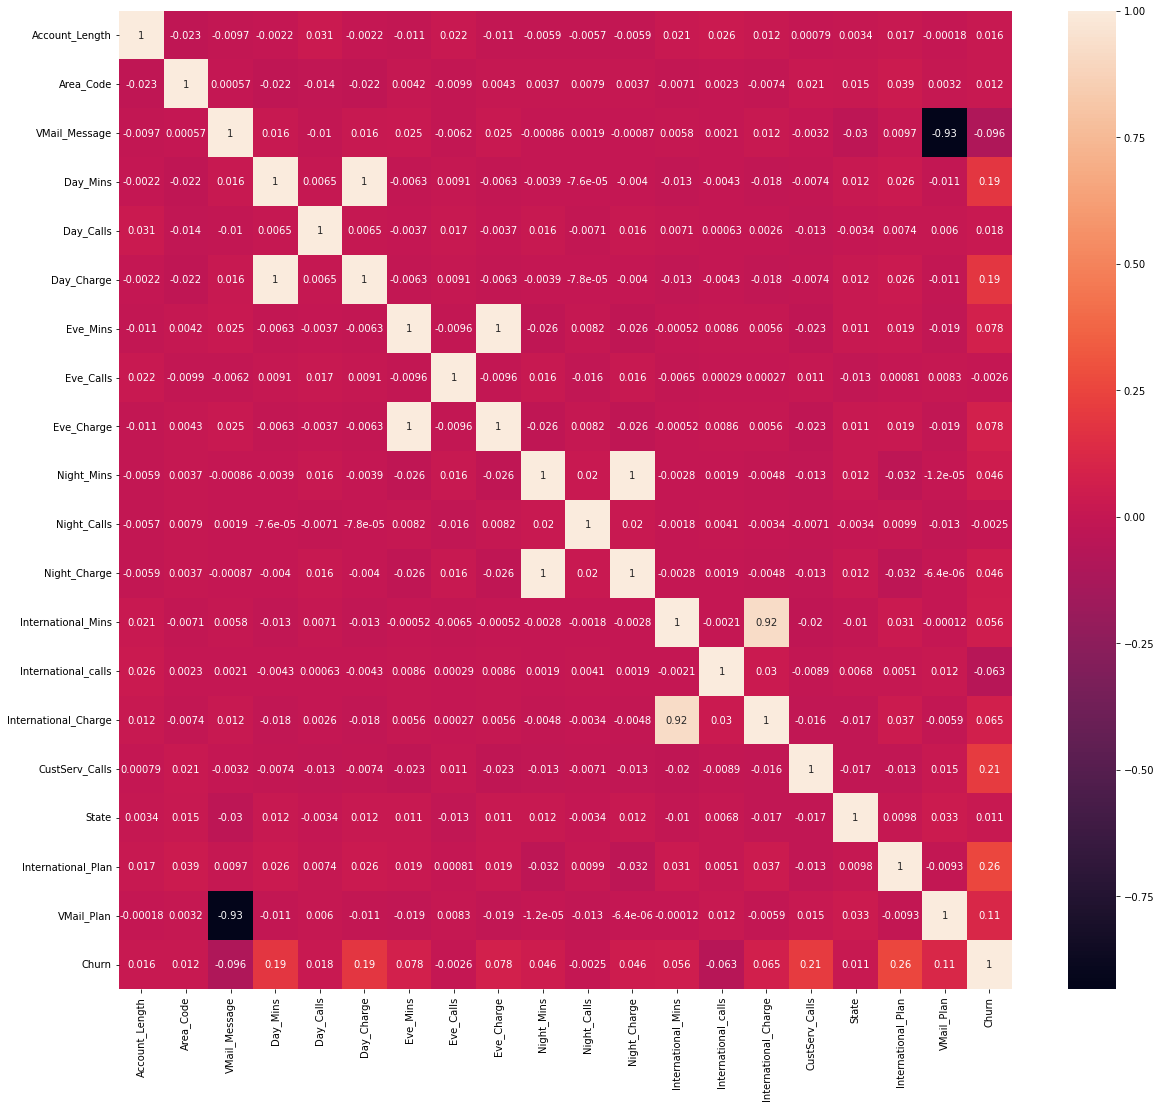

In [48]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Split the data into x and y 

In [49]:
x =df.drop(['Churn'],axis=1)
y =df[['Churn']]

In [50]:
x.head()

,Account_Length,Area_Code,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,State,International_Plan,VMail_Plan
0,0.722804,-0.521392,1.355720,1.609731,0.511593,1.610020,-0.065339,-0.062503,-0.065158,0.905211,-0.461999,0.904454,-0.12704,-0.596661,-0.102005,-0.433885,16,0,0
1,0.179794,-0.521392,1.432525,-0.359581,1.190052,-0.359870,-0.104328,0.144919,-0.103784,1.104506,0.166385,1.105346,1.32558,-0.596661,1.241481,-0.433885,35,0,0
2,0.955522,-0.521392,-0.564400,1.196841,0.720350,1.197014,-1.628983,0.507908,-1.629530,-0.781613,0.218750,-0.780301,0.73668,0.375215,0.690651,-1.199068,31,0,1
3,-0.414932,-0.686941,-0.564400,2.262363,-1.523782,2.262546,0.004429,-0.632913,0.004853,-0.076886,-0.566730,-0.077178,-1.46188,1.347092,-1.338013,0.331298,35,1,1
4,-0.647650,-0.521392,-0.564400,-0.262542,0.668161,-0.262495,-1.072884,1.130174,-1.071860,-0.282346,1.108961,-0.282636,-0.08778,-0.596661,-0.061701,1.096480,36,1,1


In [51]:
y.head()

,Churn
0,0
1,0
2,0
3,0
4,0


In [52]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,classification_report,f1_score

In [53]:
# Training and testing data creation
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [54]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3693, 19)
(924, 19)
(3693, 1)
(924, 1)


# Model creation

## 1) linear Regression

In [55]:
clf=LogisticRegression()
clf.fit(x_train,y_train)

C:\Users\PRATIK KALE\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PRATIK KALE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
# Make predictions on the test data
y_test_pred = clf.predict(x_test)

# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print(f"Testin Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Testin Accuracy: 0.87
Confusion Matrix:
[[775  21]
 [100  28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       796
           1       0.57      0.22      0.32       128

    accuracy                           0.87       924
   macro avg       0.73      0.60      0.62       924
weighted avg       0.84      0.87      0.84       924



In [57]:
# Make predictions on the train data
y_train_pred = clf.predict(x_train)

# Evaluation matrics to evaluate trained model on train dataset
accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix = confusion_matrix(y_train, y_train_pred)
class_report = classification_report(y_train, y_train_pred)

print(f"Training Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Training Accuracy: 0.86
Confusion Matrix:
[[3089   76]
 [ 430   98]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.92      3165
           1       0.56      0.19      0.28       528

    accuracy                           0.86      3693
   macro avg       0.72      0.58      0.60      3693
weighted avg       0.83      0.86      0.83      3693



## 2) Random forest

In [58]:
rf_c =RandomForestClassifier()
rf_c.fit(x_train,y_train)

C:\Users\PRATIK KALE\AppData\Local\Temp\ipykernel_29536\73392775.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_c.fit(x_train,y_train)


RandomForestClassifier()

In [59]:
# Make predictions on the test data
y_test_pred = rf_c.predict(x_test)

# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print(f"Testin Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Testin Accuracy: 0.95
Confusion Matrix:
[[793   3]
 [ 40  88]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       796
           1       0.97      0.69      0.80       128

    accuracy                           0.95       924
   macro avg       0.96      0.84      0.89       924
weighted avg       0.95      0.95      0.95       924



In [60]:
# Make predictions on the train data
y_train_pred = rf_c.predict(x_train)

# Evaluation matrics to evaluate trained model on train dataset
accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix = confusion_matrix(y_train, y_train_pred)
class_report = classification_report(y_train, y_train_pred)

print(f"Training Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Training Accuracy: 1.00
Confusion Matrix:
[[3165    0]
 [   0  528]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3165
           1       1.00      1.00      1.00       528

    accuracy                           1.00      3693
   macro avg       1.00      1.00      1.00      3693
weighted avg       1.00      1.00      1.00      3693



## 3) Gradient Boosting

In [61]:
GB =GradientBoostingClassifier()
GB.fit(x_train,y_train)

C:\Users\PRATIK KALE\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [62]:
# Make predictions on the test data
y_test_pred = GB.predict(x_test)

# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print(f"Testing Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Testin Accuracy: 0.95
Confusion Matrix:
[[793   3]
 [ 41  87]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       796
           1       0.97      0.68      0.80       128

    accuracy                           0.95       924
   macro avg       0.96      0.84      0.89       924
weighted avg       0.95      0.95      0.95       924



In [63]:
# Make predictions on the train data
y_train_pred = GB.predict(x_train)

# Evaluation matrics to evaluate trained model on train dataset
accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix = confusion_matrix(y_train, y_train_pred)
class_report = classification_report(y_train, y_train_pred)

print(f"Training Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Training Accuracy: 0.97
Confusion Matrix:
[[3155   10]
 [ 112  416]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3165
           1       0.98      0.79      0.87       528

    accuracy                           0.97      3693
   macro avg       0.97      0.89      0.93      3693
weighted avg       0.97      0.97      0.97      3693



## 4) AdaBoostClassifier

In [64]:
AB =AdaBoostClassifier()
AB.fit(x_train,y_train)

C:\Users\PRATIK KALE\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier()

In [65]:
# Make predictions on the test data
y_test_pred = AB.predict(x_test)

# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print(f"Testin Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Testin Accuracy: 0.89
Confusion Matrix:
[[779  17]
 [ 87  41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       796
           1       0.71      0.32      0.44       128

    accuracy                           0.89       924
   macro avg       0.80      0.65      0.69       924
weighted avg       0.87      0.89      0.87       924



In [66]:
# Make predictions on the train data
y_train_pred = AB.predict(x_train)

# Evaluation matrics to evaluate trained model on train dataset
accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix = confusion_matrix(y_train, y_train_pred)
class_report = classification_report(y_train, y_train_pred)

print(f"Training Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Training Accuracy: 0.88
Confusion Matrix:
[[3076   89]
 [ 339  189]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      3165
           1       0.68      0.36      0.47       528

    accuracy                           0.88      3693
   macro avg       0.79      0.66      0.70      3693
weighted avg       0.87      0.88      0.87      3693



## 5) KNeighborsClassifier

In [67]:
KNC = KNeighborsClassifier()
KNC.fit(x_train,y_train)

C:\Users\PRATIK KALE\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [68]:
# Make predictions on the test data
y_test_pred = KNC.predict(x_test)

# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print(f"Testin Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Testin Accuracy: 0.87
Confusion Matrix:
[[789   7]
 [112  16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       796
           1       0.70      0.12      0.21       128

    accuracy                           0.87       924
   macro avg       0.79      0.56      0.57       924
weighted avg       0.85      0.87      0.83       924



In [69]:
# Make predictions on the train data
y_train_pred = KNC.predict(x_train)

# Evaluation matrics to evaluate trained model on train dataset
accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix = confusion_matrix(y_train, y_train_pred)
class_report = classification_report(y_train, y_train_pred)

print(f"Training Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Training Accuracy: 0.89
Confusion Matrix:
[[3158    7]
 [ 390  138]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      3165
           1       0.95      0.26      0.41       528

    accuracy                           0.89      3693
   macro avg       0.92      0.63      0.68      3693
weighted avg       0.90      0.89      0.86      3693



## 6) SVC

In [70]:
svc = SVC()
svc.fit(x_train, y_train)

C:\Users\PRATIK KALE\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [71]:
# Make predictions on the test data
y_test_pred = svc.predict(x_test)

# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print(f"Testin Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Testin Accuracy: 0.86
Confusion Matrix:
[[796   0]
 [128   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       796
           1       0.00      0.00      0.00       128

    accuracy                           0.86       924
   macro avg       0.43      0.50      0.46       924
weighted avg       0.74      0.86      0.80       924



C:\Users\PRATIK KALE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PRATIK KALE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PRATIK KALE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
# Make predictions on the train data
y_train_pred = svc.predict(x_train)

# Evaluation matrics to evaluate trained model on train dataset
accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix = confusion_matrix(y_train, y_train_pred)
class_report = classification_report(y_train, y_train_pred)

print(f"Training Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Training Accuracy: 0.86
Confusion Matrix:
[[3165    0]
 [ 528    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      3165
           1       0.00      0.00      0.00       528

    accuracy                           0.86      3693
   macro avg       0.43      0.50      0.46      3693
weighted avg       0.73      0.86      0.79      3693



C:\Users\PRATIK KALE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PRATIK KALE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PRATIK KALE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 7) DecisionTreeClassifier

In [73]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [74]:
# Make predictions on the test data
y_test_pred = dt_classifier.predict(x_test)

# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print(f"Testin Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Testin Accuracy: 0.91
Confusion Matrix:
[[753  43]
 [ 42  86]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       796
           1       0.67      0.67      0.67       128

    accuracy                           0.91       924
   macro avg       0.81      0.81      0.81       924
weighted avg       0.91      0.91      0.91       924



In [75]:
# Make predictions on the train data
y_train_pred = dt_classifier.predict(x_train)

# Evaluation matrics to evaluate trained model on train dataset
accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix = confusion_matrix(y_train, y_train_pred)
class_report = classification_report(y_train, y_train_pred)

print(f"Training Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Training Accuracy: 1.00
Confusion Matrix:
[[3165    0]
 [   0  528]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3165
           1       1.00      1.00      1.00       528

    accuracy                           1.00      3693
   macro avg       1.00      1.00      1.00      3693
weighted avg       1.00      1.00      1.00      3693



## 8) GauusianNB

In [76]:
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

C:\Users\PRATIK KALE\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [77]:
# Make predictions on the test data
y_test_pred = nb_classifier.predict(x_test)

# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print(f"Testin Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Testin Accuracy: 0.88
Confusion Matrix:
[[741  55]
 [ 56  72]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       796
           1       0.57      0.56      0.56       128

    accuracy                           0.88       924
   macro avg       0.75      0.75      0.75       924
weighted avg       0.88      0.88      0.88       924



In [78]:
# Make predictions on the train data
y_train_pred = nb_classifier.predict(x_train)

# Evaluation matrics to evaluate trained model on train dataset
accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix = confusion_matrix(y_train, y_train_pred)
class_report = classification_report(y_train, y_train_pred)

print(f"Training Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Training Accuracy: 0.86
Confusion Matrix:
[[2935  230]
 [ 272  256]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      3165
           1       0.53      0.48      0.50       528

    accuracy                           0.86      3693
   macro avg       0.72      0.71      0.71      3693
weighted avg       0.86      0.86      0.86      3693



# Apply SMOTE Technique to balance the data


In [79]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [80]:
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x_train,y_train)
print("Actual Classes", Counter(y_train))
print("SMOTE Classes", Counter(y_smote))

Actual Classes Counter({'Churn': 1})
SMOTE Classes Counter({'Churn': 1})


In [81]:
y_smote.value_counts()

Churn
0        3165
1        3165
Name: count, dtype: int64

## 1) LogisticRegression

In [82]:
clf=LogisticRegression()
clf.fit(x_smote,y_smote)

C:\Users\PRATIK KALE\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PRATIK KALE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [83]:
# Make predictions on the test data
y_pred_log = clf.predict(x_test)

# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_log)
conf_matrix = confusion_matrix(y_test, y_pred_log)
class_report = classification_report(y_test, y_pred_log)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.73
Confusion Matrix:
[[581 215]
 [ 33  95]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.73      0.82       796
           1       0.31      0.74      0.43       128

    accuracy                           0.73       924
   macro avg       0.63      0.74      0.63       924
weighted avg       0.86      0.73      0.77       924



In [84]:
# Make predictions on the train data
y_train_pred = nb_classifier.predict(x_smote)

# Evaluation matrics to evaluate trained model on train dataset
accuracy = accuracy_score(y_smote, y_train_pred)
conf_matrix = confusion_matrix(y_smote, y_train_pred)
class_report = classification_report(y_smote, y_train_pred)

print(f"Training Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Training Accuracy: 0.63
Confusion Matrix:
[[2935  230]
 [2135 1030]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.93      0.71      3165
           1       0.82      0.33      0.47      3165

    accuracy                           0.63      6330
   macro avg       0.70      0.63      0.59      6330
weighted avg       0.70      0.63      0.59      6330



## 2) RandomForestClassifier

In [85]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_smote, y_smote)

C:\Users\PRATIK KALE\AppData\Local\Temp\ipykernel_29536\2786049711.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(x_smote, y_smote)


RandomForestClassifier()

In [86]:
# Make predictions on the test data
y_pred_log = rf_classifier.predict(x_test)

# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_log)
conf_matrix = confusion_matrix(y_test, y_pred_log)
class_report = classification_report(y_test, y_pred_log)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.94
Confusion Matrix:
[[775  21]
 [ 35  93]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       796
           1       0.82      0.73      0.77       128

    accuracy                           0.94       924
   macro avg       0.89      0.85      0.87       924
weighted avg       0.94      0.94      0.94       924



In [87]:
# Make predictions on the train data
y_train_pred = rf_classifier.predict(x_smote)

# Evaluation matrics to evaluate trained model on train dataset
accuracy = accuracy_score(y_smote, y_train_pred)
conf_matrix = confusion_matrix(y_smote, y_train_pred)
class_report = classification_report(y_smote, y_train_pred)

print(f"Training Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Training Accuracy: 1.00
Confusion Matrix:
[[3165    0]
 [   0 3165]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3165
           1       1.00      1.00      1.00      3165

    accuracy                           1.00      6330
   macro avg       1.00      1.00      1.00      6330
weighted avg       1.00      1.00      1.00      6330



## 3) GradientBoostingClassifier

In [88]:
GB =GradientBoostingClassifier()
GB.fit(x_smote,y_smote)

C:\Users\PRATIK KALE\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [89]:
# Make predictions on the test data
y_pred_log = GB.predict(x_test)

# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_log)
conf_matrix = confusion_matrix(y_test, y_pred_log)
class_report = classification_report(y_test, y_pred_log)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.94
Confusion Matrix:
[[772  24]
 [ 30  98]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       796
           1       0.80      0.77      0.78       128

    accuracy                           0.94       924
   macro avg       0.88      0.87      0.88       924
weighted avg       0.94      0.94      0.94       924



In [90]:
# Make predictions on the train data
y_train_pred = GB.predict(x_smote)

# Evaluation matrics to evaluate trained model on train dataset
accuracy = accuracy_score(y_smote, y_train_pred)
conf_matrix = confusion_matrix(y_smote, y_train_pred)
class_report = classification_report(y_smote, y_train_pred)

print(f"Training Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Training Accuracy: 0.96
Confusion Matrix:
[[3092   73]
 [ 204 2961]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3165
           1       0.98      0.94      0.96      3165

    accuracy                           0.96      6330
   macro avg       0.96      0.96      0.96      6330
weighted avg       0.96      0.96      0.96      6330



## 4) AdaBoostClassifier

In [91]:
AB =AdaBoostClassifier()
AB.fit(x_smote,y_smote)

C:\Users\PRATIK KALE\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier()

In [92]:
# Make predictions on the test data
y_pred_log = AB.predict(x_test)

# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_log)
conf_matrix = confusion_matrix(y_test, y_pred_log)
class_report = classification_report(y_test, y_pred_log)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.88
Confusion Matrix:
[[735  61]
 [ 49  79]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       796
           1       0.56      0.62      0.59       128

    accuracy                           0.88       924
   macro avg       0.75      0.77      0.76       924
weighted avg       0.89      0.88      0.88       924



In [93]:
# Make predictions on the train data
y_train_pred = AB.predict(x_smote)

# Evaluation matrics to evaluate trained model on train dataset
accuracy = accuracy_score(y_smote, y_train_pred)
conf_matrix = confusion_matrix(y_smote, y_train_pred)
class_report = classification_report(y_smote, y_train_pred)

print(f"Training Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Training Accuracy: 0.89
Confusion Matrix:
[[2917  248]
 [ 417 2748]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      3165
           1       0.92      0.87      0.89      3165

    accuracy                           0.89      6330
   macro avg       0.90      0.89      0.89      6330
weighted avg       0.90      0.89      0.89      6330



## 5) KNeighborsClassifier

In [94]:
KNC = KNeighborsClassifier()
KNC.fit(x_smote,y_smote)

C:\Users\PRATIK KALE\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [95]:
# Make predictions on the test data
y_pred_log = KNC.predict(x_test)

# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_log)
conf_matrix = confusion_matrix(y_test, y_pred_log)
class_report = classification_report(y_test, y_pred_log)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.74
Confusion Matrix:
[[607 189]
 [ 48  80]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.76      0.84       796
           1       0.30      0.62      0.40       128

    accuracy                           0.74       924
   macro avg       0.61      0.69      0.62       924
weighted avg       0.84      0.74      0.78       924



In [96]:
# Make predictions on the train data
y_train_pred = KNC.predict(x_smote)

# Evaluation matrics to evaluate trained model on train dataset
accuracy = accuracy_score(y_smote, y_train_pred)
conf_matrix = confusion_matrix(y_smote, y_train_pred)
class_report = classification_report(y_smote, y_train_pred)

print(f"Training Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Training Accuracy: 0.91
Confusion Matrix:
[[2625  540]
 [  12 3153]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.90      3165
           1       0.85      1.00      0.92      3165

    accuracy                           0.91      6330
   macro avg       0.92      0.91      0.91      6330
weighted avg       0.92      0.91      0.91      6330



## 6) svc

In [97]:
svc = SVC()
svc.fit(x_smote, y_smote)

C:\Users\PRATIK KALE\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [98]:
# Make predictions on the test data
y_pred_log = svc.predict(x_test)

# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_log)
conf_matrix = confusion_matrix(y_test, y_pred_log)
class_report = classification_report(y_test, y_pred_log)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.71
Confusion Matrix:
[[565 231]
 [ 37  91]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.71      0.81       796
           1       0.28      0.71      0.40       128

    accuracy                           0.71       924
   macro avg       0.61      0.71      0.61       924
weighted avg       0.85      0.71      0.75       924



In [99]:
# Make predictions on the train data
y_train_pred = svc.predict(x_smote)

# Evaluation matrics to evaluate trained model on train dataset
accuracy = accuracy_score(y_smote, y_train_pred)
conf_matrix = confusion_matrix(y_smote, y_train_pred)
class_report = classification_report(y_smote, y_train_pred)

print(f"Training Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Training Accuracy: 0.74
Confusion Matrix:
[[2263  902]
 [ 730 2435]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.72      0.73      3165
           1       0.73      0.77      0.75      3165

    accuracy                           0.74      6330
   macro avg       0.74      0.74      0.74      6330
weighted avg       0.74      0.74      0.74      6330



## 7) DecisionTreeClassifier

In [100]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(x_smote, y_smote)

DecisionTreeClassifier(random_state=42)

In [101]:
# Make predictions on the test data
y_pred_log = dt_classifier.predict(x_test)

# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_log)
conf_matrix = confusion_matrix(y_test, y_pred_log)
class_report = classification_report(y_test, y_pred_log)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.89
Confusion Matrix:
[[732  64]
 [ 35  93]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       796
           1       0.59      0.73      0.65       128

    accuracy                           0.89       924
   macro avg       0.77      0.82      0.79       924
weighted avg       0.90      0.89      0.90       924



In [102]:
# Make predictions on the train data
y_train_pred = dt_classifier.predict(x_smote)

# Evaluation matrics to evaluate trained model on train dataset
accuracy = accuracy_score(y_smote, y_train_pred)
conf_matrix = confusion_matrix(y_smote, y_train_pred)
class_report = classification_report(y_smote, y_train_pred)

print(f"Training Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Training Accuracy: 1.00
Confusion Matrix:
[[3165    0]
 [   0 3165]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3165
           1       1.00      1.00      1.00      3165

    accuracy                           1.00      6330
   macro avg       1.00      1.00      1.00      6330
weighted avg       1.00      1.00      1.00      6330



## 8) GaussianNB

In [103]:
nb_classifier = GaussianNB()
nb_classifier.fit(x_smote, y_smote)

C:\Users\PRATIK KALE\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [104]:
# Make predictions on the test data
y_pred_log = nb_classifier.predict(x_test)

# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_log)
conf_matrix = confusion_matrix(y_test, y_pred_log)
class_report = classification_report(y_test, y_pred_log)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.69
Confusion Matrix:
[[543 253]
 [ 32  96]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.68      0.79       796
           1       0.28      0.75      0.40       128

    accuracy                           0.69       924
   macro avg       0.61      0.72      0.60       924
weighted avg       0.85      0.69      0.74       924



In [105]:
# Make predictions on the train data
y_train_pred = nb_classifier.predict(x_smote)

# Evaluation matrics to evaluate trained model on train dataset
accuracy = accuracy_score(y_smote, y_train_pred)
conf_matrix = confusion_matrix(y_smote, y_train_pred)
class_report = classification_report(y_smote, y_train_pred)

print(f"Training Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Training Accuracy: 0.75
Confusion Matrix:
[[2250  915]
 [ 696 2469]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.71      0.74      3165
           1       0.73      0.78      0.75      3165

    accuracy                           0.75      6330
   macro avg       0.75      0.75      0.75      6330
weighted avg       0.75      0.75      0.75      6330



## hyper tunning

## 1) XGBClassifier

In [106]:
from sklearn.model_selection import RandomizedSearchCV

In [107]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [108]:
param_grid = {'gamma': [0,0.1, 0.2, 0.4, 0.8, 1.6, 3.2],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2],
              'max_depth': [5, 6, 7, 8, 9, 10],
              'n_estimators': [50, 100, 150, 200],
              'reg_alpha': [0, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4],
              'reg_lambda': [0, 0.1, 0.2, 0.4, 0.8, 1.6]}

XGB = XGBClassifier(random_state=42, verbosity=0, silent=0)
rcv = RandomizedSearchCV(estimator=XGB, 
                        scoring='accuracy', 
                        param_distributions=param_grid, 
                        n_iter=100, 
                        cv=3, 
                        verbose=2, 
                        random_state=42, 
                        n_jobs=-1)

rcv.fit(x_train, y_train)
cv_best_params = rcv.best_params_
print(f"Best paramters: {cv_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 0.2, 'reg_alpha': 0.2, 'n_estimators': 150, 'max_depth': 8, 'learning_rate': 0.15, 'gamma': 0.2})
